In [ ]:
# Three Observations

#The sample taken for the study is fairly equal between the 2 genders.
#There is a linear relation between the Tumor volume and weight of the mouse. The more the weight, the more tumor volume.
# The data for the Infubinol is skewed as there are few outliers in the Infubinol regimen. Infubinol potential outliers: 31    36.321346

In [205]:
import pandas as pd


In [207]:
import matplotlib.pyplot as plt
import scipy.stats as st

In [209]:
#uploading the datasets in to pandas
mouse_metadata = pd.read_csv(r'C:\Users\karki\Downloads\Starter_Code (6)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv')
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [211]:
study_results = pd.read_csv(r"C:\Users\karki\Downloads\Starter_Code (6)\Starter_Code\Pymaceuticals\data\Study_results.csv")
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [213]:
df_complete = pd.merge( mouse_metadata, study_results, on ='Mouse ID')
df_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [215]:
#counting unique mouse ID
unique_mouseID = df_complete['Mouse ID'].nunique()
unique_mouseID

249

In [217]:
#looking for the duplicated data
df_duplicate_time = df_complete[df_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
df_duplicate_time.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [219]:
#Filtering the duplicates
cleaned_df = df_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [221]:
unique_mouseID_cleaned = cleaned_df['Mouse ID'].nunique()
unique_mouseID_cleaned

249

In [223]:
#Summary of the data
summary_statistics = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [225]:
#Mice tested per regimen
mice_count_perregimen = cleaned_df['Drug Regimen'].value_counts()
mice_count_perregimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     151
Name: count, dtype: int64

<Axes: xlabel='Drug Regimen'>

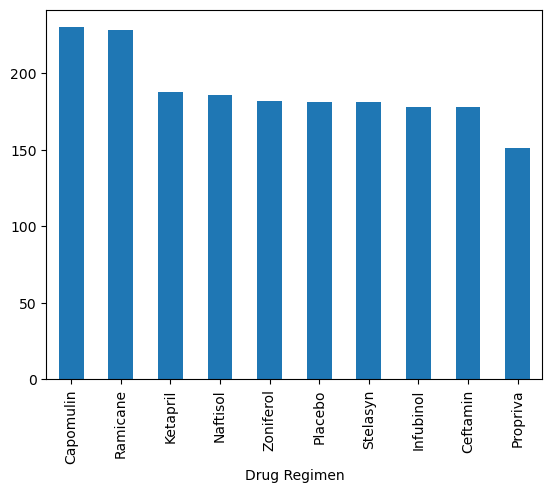

In [227]:
mice_count_perregimen.plot.bar()

Text(0, 0.5, '# of observed mouse timepoints')

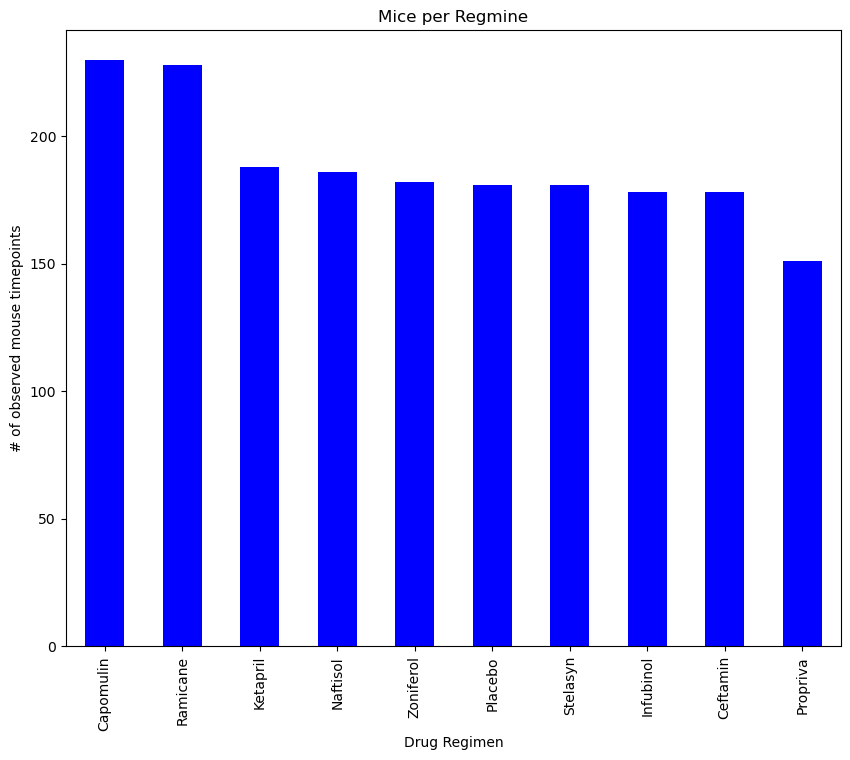

In [229]:
# panadas Bar plot
fig1 = mice_count_perregimen.plot(kind = 'bar',facecolor = 'blue', figsize = (10,8), title ='Mice per Regmine')
fig1.set_xlabel('Drug Regimen')
fig1.set_ylabel('# of observed mouse timepoints')


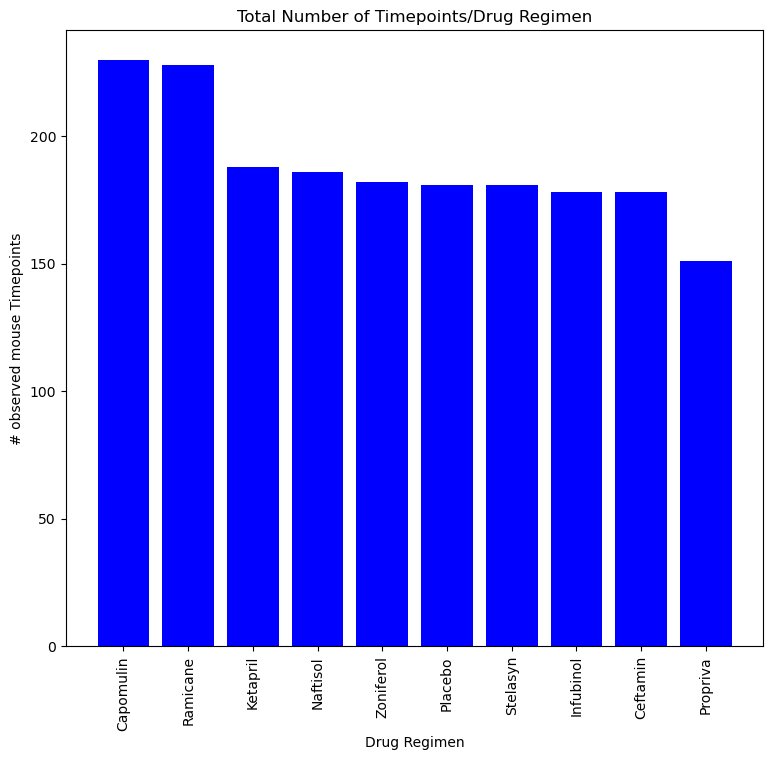

In [231]:
#matplotlib bar plot
plt.figure(figsize=(9, 8))
plt.bar(mice_count_perregimen.index, mice_count_perregimen.values, color='blue')
plt.title('Total Number of Timepoints/Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# observed mouse Timepoints')
plt.xticks(rotation= 90)
plt.show()

In [233]:
Gender_count = cleaned_df['Sex'].value_counts()
Gender_count

Sex
Male      958
Female    925
Name: count, dtype: int64

Text(0, 0.5, 'Sex')

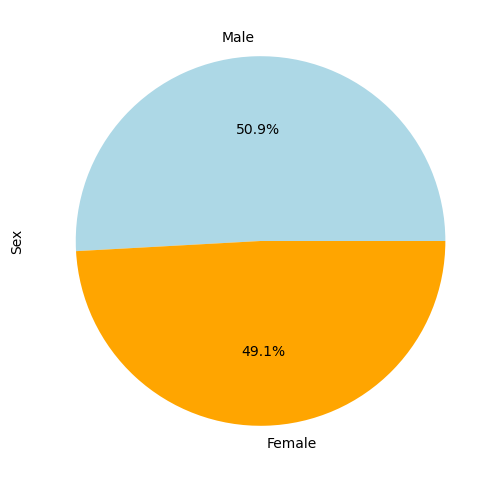

In [235]:
#pandas pie chart
fig2 = Gender_count.plot(kind = "pie",autopct='%1.1f%%', figsize=(6, 6), colors=['lightblue', 'orange'])
fig2.set_ylabel('Sex')

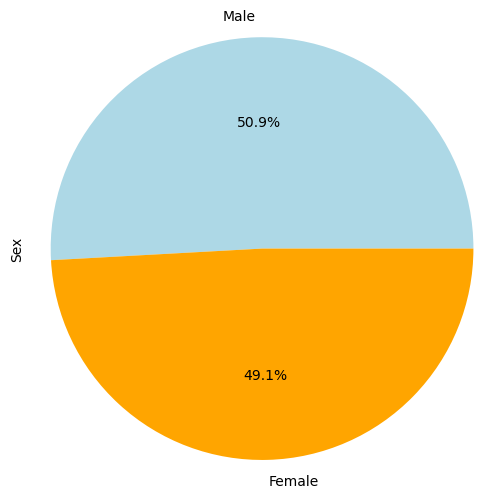

In [237]:
#matplotlib piechart
plt.figure(figsize=(6, 6))
plt.pie(Gender_count, labels=Gender_count.index, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=0)
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

In [239]:
# filtering the max timepoint for each mice
max_timepoint = cleaned_df.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()
max_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [241]:
last_timepoint_df = pd.merge(max_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
last_timepoint_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [243]:
groups_df = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [245]:
#Creating empty list
tumor_volumes_df = []

In [247]:
#finding the quartiles, IQR and outliers
for group in groups_df:
    group_data = last_timepoint_df[last_timepoint_df['Drug Regimen'] == group]['Tumor Volume (mm3)']
    tumor_volumes_df.append(group_data)
    
    
    quartiles = group_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = group_data[(group_data < lower_bound) | (group_data > upper_bound)]
    
    print(f"{group} IQR: {iqr}")
    print(f"{group} potential outliers: {outliers}")




Capomulin IQR: 7.781863460000004
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane IQR: 9.098536719999998
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol IQR: 11.477135160000003
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin IQR: 15.577752179999997
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


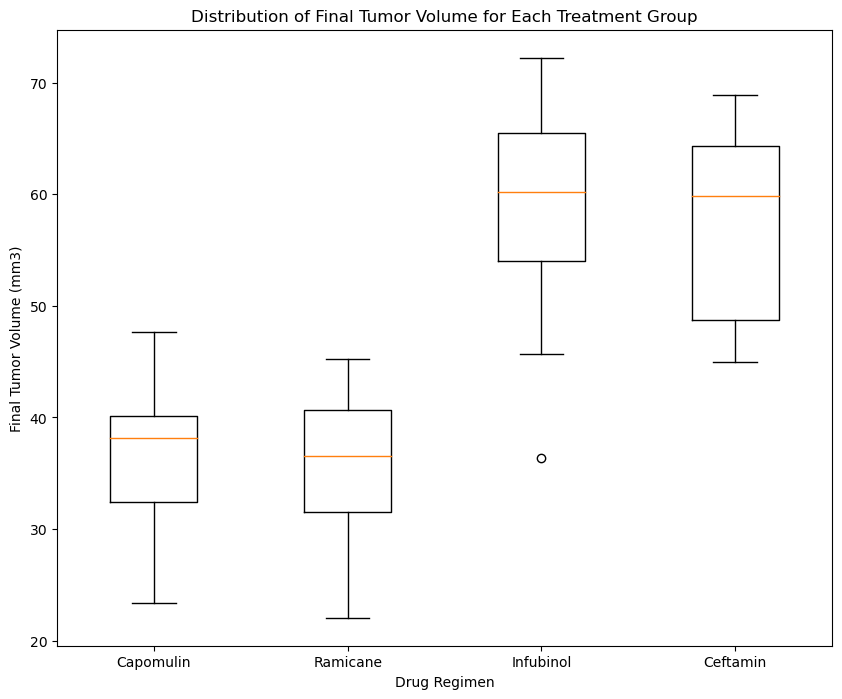

In [249]:
#plotting the box plot and seeing outliers
plt.figure(figsize=(10, 8))
plt.boxplot(tumor_volumes_df, labels= groups_df)
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [251]:
capomulin_one = mouse_metadata[mouse_metadata['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[4]
capomulin_one


'u364'

In [253]:
capomulin_one_df = study_results[study_results['Mouse ID'] == capomulin_mouse]
capomulin_one_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
234,u364,0,45.000000,0
324,u364,5,45.760886,1
513,u364,10,46.568417,2
862,u364,15,47.212200,2
918,u364,20,40.343948,2


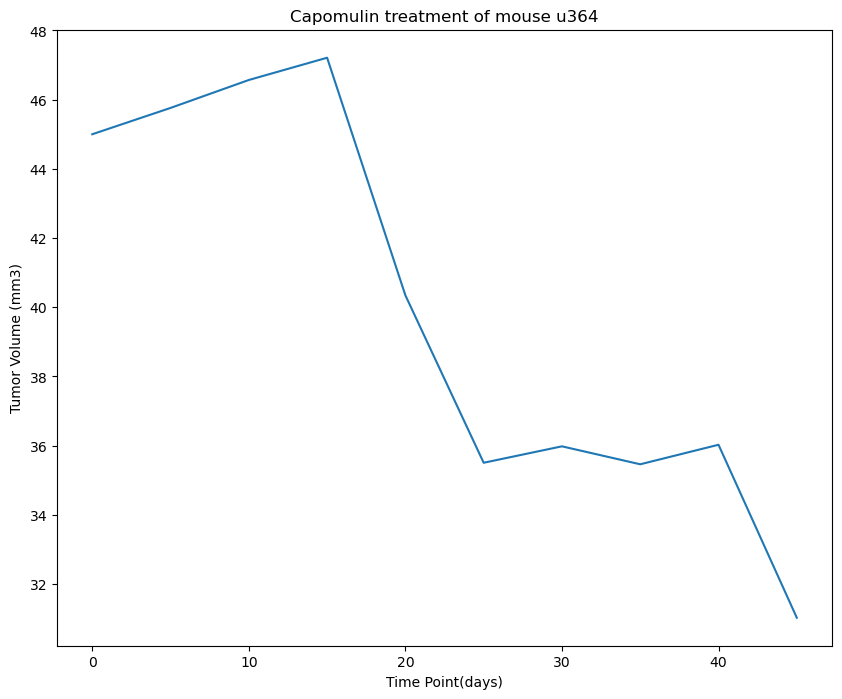

In [255]:
plt.figure(figsize=(10, 8))
plt.plot(capomulin_one_df['Timepoint'], capomulin_one_df['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse u364')
plt.xlabel('Time Point(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
#line plot for particular mouseID for capomulin regimen

In [257]:
capomulin_mice = mouse_metadata[mouse_metadata['Drug Regimen'] == 'Capomulin']

In [259]:
capomulin_data = pd.merge(capomulin_mice, study_results, on='Mouse ID')

In [261]:
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg_tumor_volume.head()

,Mouse ID,Tumor Volume (mm3)
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344


In [263]:
capomulin_avg_tumor_volume = pd.merge(capomulin_avg_tumor_volume, capomulin_mice[['Mouse ID', 'Weight (g)']], on='Mouse ID')
capomulin_avg_tumor_volume.head()

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


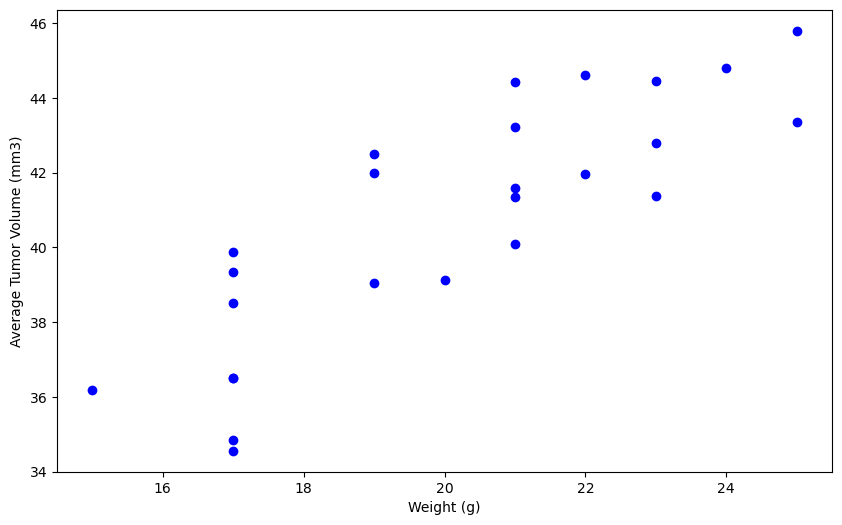

In [265]:
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
#comparing the Tumor volume with weight using scatterplot

In [267]:
correlation = capomulin_avg_tumor_volume['Weight (g)'].corr(capomulin_avg_tumor_volume['Tumor Volume (mm3)'])
correlation
#finding corelation

0.8419363424694722

In [272]:
from scipy.stats import linregress

In [276]:
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err

(0.9544396890241048,
 21.552160532685008,
 0.8419363424694721,
 1.3225722434712404e-07,
 0.12754359033201323)

In [282]:
regression_line = slope * capomulin_avg_tumor_volume['Weight (g)'] + intercept
#regression line

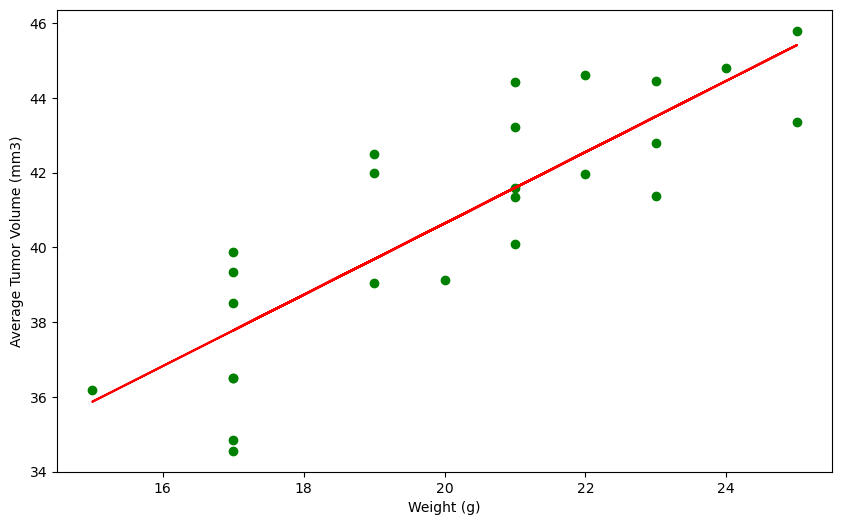

In [296]:
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='green')
plt.plot(capomulin_avg_tumor_volume['Weight (g)'], regression_line, color='red', label='Regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()